In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import dstack, vstack, unique
import matplotlib


# Load data

In [4]:
x_train = pd.read_csv('./X_train.txt', header=None, delim_whitespace=True)
y_train = pd.read_csv('./y_train.txt', header=None, delim_whitespace=True)

# DBSCAN - Before PCA

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [6]:
db = DBSCAN(eps=0.03, min_samples=12)

In [7]:
db.fit(x_train)

DBSCAN(eps=0.03, min_samples=12)

In [8]:
x_train['Labels'] = db.labels_

In [9]:
x_train['Labels'].value_counts()

-1    7352
Name: Labels, dtype: int64

# PCA

we have normalized data so I do not do standardization

In [10]:
pca = PCA(n_components=2)

In [11]:
x_pca = pca.fit_transform(x_train)

In [12]:
x_pca = pd.DataFrame(data=x_pca)

In [13]:
x_pca

,0,1
0,-5.520280,-0.290277
1,-5.535350,-0.082530
2,-5.474988,0.287387
3,-5.677232,0.897031
4,-5.748749,1.162952
...,...,...
7347,6.253517,-2.636767
7348,5.782321,-2.437814
7349,5.857505,-3.081843
7350,5.421095,-3.426430


In [14]:
finalDF = pd.concat([x_pca, y_train],axis=1, ignore_index=True)

In [15]:
finalDF

,0,1,2
0,-5.520280,-0.290277,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897031,5
4,-5.748749,1.162952,5
...,...,...,...
7347,6.253517,-2.636767,2
7348,5.782321,-2.437814,2
7349,5.857505,-3.081843,2
7350,5.421095,-3.426430,2


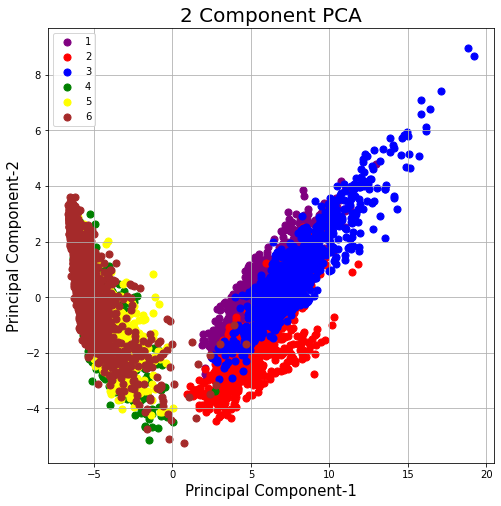

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component-1', fontsize = 15)
ax.set_ylabel('Principal Component-2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize=20)

targets = [1, 2, 3, 4, 5, 6]
colors = ['purple','red','blue','green', 'yellow', 'brown']

for target, color in zip(targets, colors):
    indicesToKeep = finalDF[2] == target
    ax.scatter(finalDF.loc[indicesToKeep, 0],
               finalDF.loc[indicesToKeep, 1],
               c = color,
               s = 50)
    
ax.legend(targets)
ax.grid()

# DBSCAN - After PCA

In [17]:
dbscan = DBSCAN(eps=0.03, min_samples=12)

In [18]:
dbscan.fit(finalDF[[0,1]])

DBSCAN(eps=0.03, min_samples=12)

In [19]:
dbscan.labels_ 

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [20]:
finalDF['DBSCAN_labels']=dbscan.labels_ 

In [21]:
finalDF['DBSCAN_labels'].value_counts()

-1    7352
Name: DBSCAN_labels, dtype: int64

In [22]:
colors=['purple','red','blue','green', 'yellow', 'brown']

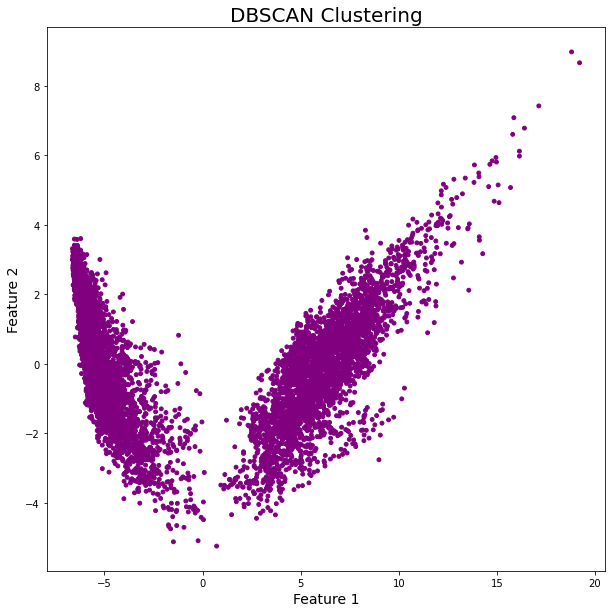

In [23]:

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(finalDF[0], finalDF[1],c=finalDF['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# Optimized DBSCAN

In [24]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(finalDF[[0,1]])
distances, indices = nbrs.kneighbors(finalDF[[0,1]])

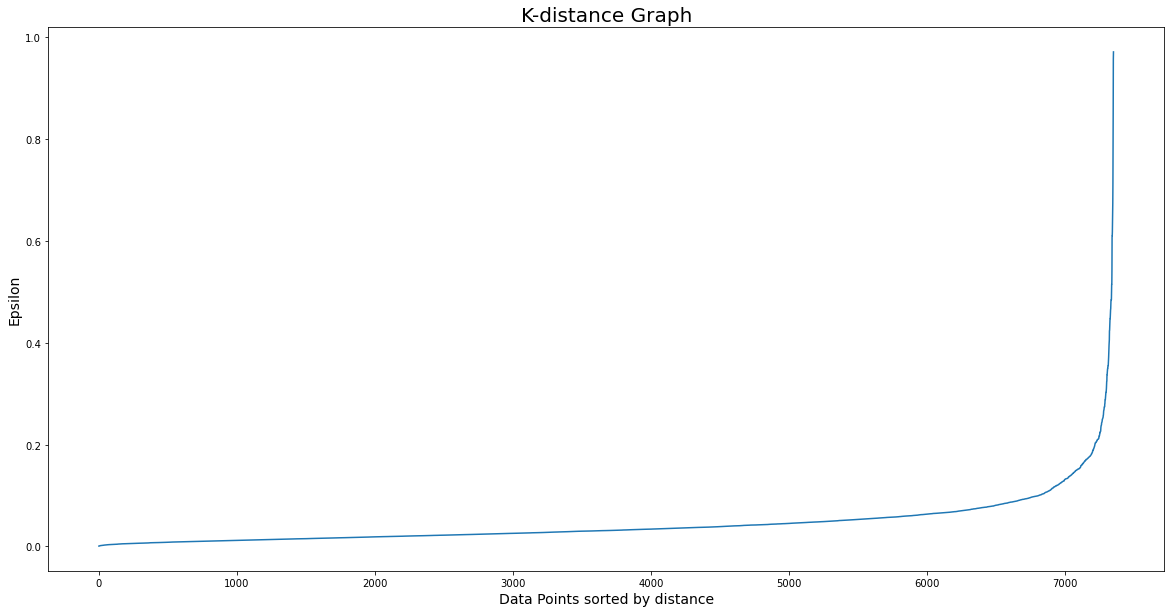

In [25]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [26]:
dbscan_opt = DBSCAN(eps=0.2, min_samples=12)

In [27]:
dbscan_opt.fit(finalDF[[0,1]])

DBSCAN(eps=0.2, min_samples=12)

In [28]:
dbscan_opt.labels_ 

array([ 0,  0,  0, ..., -1, -1, -1], dtype=int64)

In [29]:
finalDF['DBSCAN_labels']=dbscan_opt.labels_ 

In [30]:
finalDF['DBSCAN_labels'].value_counts()

 0    3643
 2    2586
-1    1010
 1      58
 4      21
 3      12
 5      12
 6      10
Name: DBSCAN_labels, dtype: int64

In [31]:
colors=['purple','red','blue','green', 'yellow', 'brown']

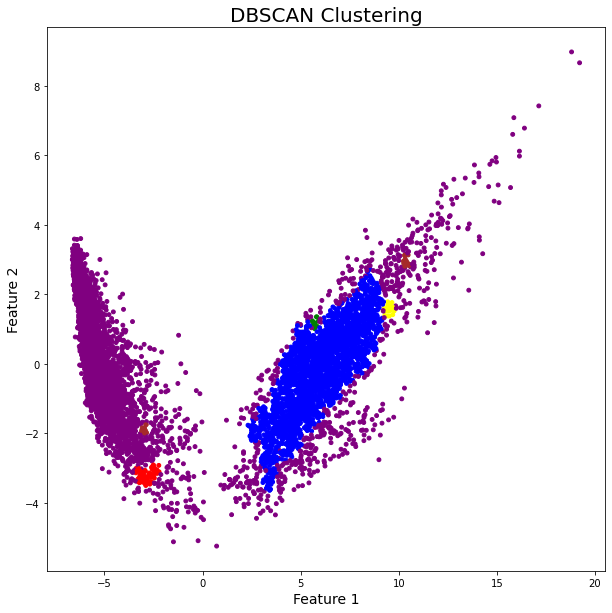

In [32]:

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(finalDF[0], finalDF[1],c=finalDF['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [33]:
n_clusters_ = len(set(finalDF['DBSCAN_labels'])) - (1 if -1 in finalDF['DBSCAN_labels'] else 0)
n_noise_ = list(finalDF['DBSCAN_labels']).count(-1)

print('Estimated number of clusters without dimensionality reduction: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters without dimensionality reduction: 8
Estimated number of noise points: 1010


# Model Performance 

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
silhouette_score(finalDF[[0,1]], finalDF[[2]], metric='euclidean', sample_size=None, random_state=None)

C:\ProgramData\Anaconda3\envs\my_tensorflow\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.01727292954681763